In [5]:
# Input: độ ẩm (Humidity) 
# Output: nhiệt độ (temperature) 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn import linear_model

data = pd.read_csv('weatherHistory.csv')
df = data[['Humidity', 'Apparent Temperature (C)']]
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Humidity                  96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778


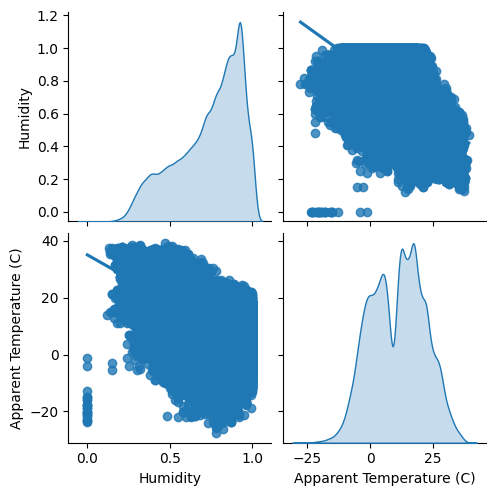

In [6]:
sns.pairplot(df[['Humidity', 'Apparent Temperature (C)']], diag_kind='kde', kind='reg')
plt.show()

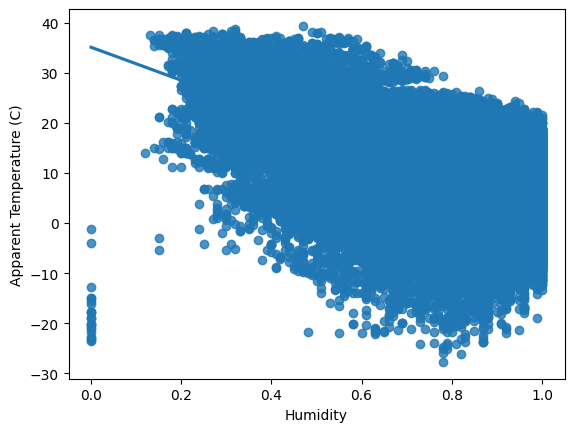

In [7]:
sns.regplot(x=df['Humidity'], y=df['Apparent Temperature (C)'], ci=None)
plt.show()

In [8]:
X = df[['Humidity']].values.astype(float)
y = df[['Apparent Temperature (C)']].values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Điểm R square thấp cho thấy mô hình dự đoán sai lệch nhiều. Điều này có thể là sự tương quan giữa các biến đầu vào và đầu ra chưa cao. 
# Điểm RSME thấp cho thấy kết quả dự đoán và giá trị thực tế chênh lệch khoảng 8.61 đơn vị.

Score or R-Squared: 0.3587532329296208
Root Mean Squared Error: 8.613447088894647
